# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039

cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],
                                                    test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [9]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

# preprocessing of project_grade_category

In [64]:
X_train["clean_essays"].values

array(['i teach title i school south carolina 100 students receive free breakfast lunch around 30 students come non english speaking homes puts disadvantage learning read write most students families also lack resources provide books educational supplies children use home despite economic disadvantages students eager learn read write they love experiencing new texts read school take home share families my students enjoy reading i want ensure continue read learn throughout lives i teach kindergarten first second grade students qualified reading assistance based upon reading readiness scores most students live homes no books academic tools use leave school nor parents help read complete homework my students need engaging books filled stunning artwork original stories like prize winning toon books fall love develop lifelong passion reading with books students opportunity read books independent reading levels well read high quality children literature through books students learn love read

In [11]:
project_data["project_grade_category"]=project_data["project_grade_category"].str.replace(" ","")
project_data["project_grade_category"]=project_data["project_grade_category"].str.replace("-","_")

In [12]:
project_data["project_grade_category"].values

array(['GradesPreK_2', 'Grades3_5', 'GradesPreK_2', ..., 'Grades3_5',
       'Grades9_12', 'GradesPreK_2'], dtype=object)

# cleaning text(Text preprocessing)

##  Text preprocessing of essay

In [13]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36           GradesPreK_2   
76127           UT 2016-04-27 00:31:25              Grades3_5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
\
"you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
'himself', \
'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
'their',\
'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
'these', 'those', \
'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
'do', 'does', \
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
'before', 'after',\
'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under'
, 'again', 'further',\
'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll'
, 'm', 'o', 're', \
've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
"hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
"mightn't", 'mustn',\
"mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", \
'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# https://stackoverflow.com/a/47091490/4084039
import re
def decontracted(phrase):
# specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
# general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
def getProcessedData(txt_type, working_data):
    preprocessed_data = []
    # tqdm is for printing the status bar
    
    for sentance in tqdm(working_data[txt_type].values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_data.append(sent.lower().strip())
        
    return preprocessed_data

In [18]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [19]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [20]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [21]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [22]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [12:33<00:00, 145.03it/s]


In [24]:
# after preprocesing
preprocessed_essays[20000]

'a person person no matter small dr seuss i teach smallest students biggest enthusiasm learning my students learn many different ways using senses multiple intelligences i use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans our school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered having social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition my students love role play pretend kitchen early childhood classroom i several kids ask can try cooking real food i take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time my students grounded appreciation work went making food knowledge ingre

In [25]:
clean_essay = []
for ess in tqdm(project_data["essay"]):
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    clean_essay.append(ess.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [09:45<00:00, 186.61it/s]


In [26]:
project_data["clean_essays"] = clean_essay

In [27]:
project_data.drop(['essay'], axis=1, inplace=True)

In [59]:
project_data["clean_essays"].values

array(['i fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed i would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons my students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students each month i try several science stem steam projects i would use kits robot help guide science instruction engaging meaningful ways i adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed the following units taught next school year i implement kits magnets motion sink vs float robots i often get units not know if i teaching right way using right materials the kits give additional ideas strategies lessons prepare students science it challenging develop high quality science activities these kits give materials i need provide students s

# Introducing new feature "Number of Words in Essay"

In [28]:
essay_word_count = []

In [29]:
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)

In [30]:
project_data["essay_word_count"] = essay_word_count

<h2><font color='red'>  Preprocessing of `project_title`</font></h2>

In [31]:
clean_titles = []
for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    clean_titles.append(title.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:27<00:00, 3913.62it/s]


In [32]:
project_data["clean_titles"]=clean_titles

In [33]:
project_data.drop(['project_title'], axis=1, inplace=True)

# Introducing new feature "Number of Words in Title"

In [34]:
title_word_count = []
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)

In [35]:
project_data["title_word_count"] = title_word_count

In [36]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36           GradesPreK_2   
76127           UT 2016-04-27 00:31:25              Grades3_5   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                            clean_essays  essay_word_count  \
55660  i fortunate enough use fairy tale stem kits cl...               175   
76127  imagine 8 9 years old you third grade classroo...               179   

                              clean_titles  title_word_count  
55660  engineering steam primary classroom                 4  
76127                  sensory tools focus                 3

In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [38]:
analyser = SentimentIntensityAnalyzer()
neg = []
pos = []
neu = []
compound = []
for a in tqdm(project_data["clean_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [2:29:50<00:00, 12.15it/s]


In [39]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

## 1.5 Preparing data for models

In [40]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_essays',
       'essay_word_count', 'clean_titles', 'title_word_count', 'pos', 'neg',
       'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

# One hot encoding of clean_categotories

In [175]:
X_train['clean_categories'].values

array(['Health_Sports', 'SpecialNeeds', 'Math_Science', ...,
       'Math_Science', 'AppliedLearning Music_Arts', 'Math_Science'],
      dtype=object)

In [41]:
# we use count vectorizer to convert the values into one 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


# One hot encoding of clean_subcategotories

In [42]:
#we use count vectorizer to convert the values into one 

vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)


print(vectorizer_sub_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 30)


In [ ]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

# One hot encoding of clean_categories

In [43]:
# we use count vectorizer to convert the values into one
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_proj = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary
=True)
vectorizer_proj.fit(X_train['clean_categories'].values)
categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)
print(vectorizer_proj.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


# One hot encoding of clean_subcategotories

In [44]:
# we use count vectorizer to convert the values into one
vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)
print(vectorizer_sub_proj.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 30)


In [45]:
#one hot encoding on school_states

my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [46]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [47]:
## we use count vectorizer to convert the values into one hot encoded features
vectorizer_states = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()),
lowercase=False, binary=True)
vectorizer_states.fit(X_train['school_state'].values)
school_state_categories_one_hot_train = vectorizer_states.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_states.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_states.transform(X_cv['school_state'].values)
print(vectorizer_states.get_feature_names())
print("Shape of matrix of Train data after one hot encoding",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding",school_state_categories_one_hot_cv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix of Train data after one hot encoding (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding (24155, 51)


In [48]:
#one hot encoding of project_grade_category
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [49]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [50]:
## we use count vectorizer to convert the values into one hot encoded features
vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)
project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values) 
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category' ].values) 
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values) 
print(vectorizer_grade.get_feature_names()) 
print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape) 
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test .shape) 
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)


['Grades9_12', 'Grades6_8', 'Grades3_5', 'GradesPreK_2']
Shape of matrix of Train data after one hot encoding  (49041, 4)
Shape of matrix of Test data after one hot encoding  (36052, 4)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 4)


In [55]:
#one hot encoding of teacher_prefix

project_data["teacher_prefix"]=project_data["teacher_prefix"].str.replace(".","")
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix=str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [56]:
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [57]:
vectorizer_teacher = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True) 
vectorizer_teacher.fit(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values. astype("U"))
print(vectorizer_teacher.get_feature_names())
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape) 
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)


['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encoding  (49041, 6)
Shape of matrix after one hot encoding  (36052, 6)
Shape of matrix after one hot encoding  (24155, 6)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

# Bag of words on essays with train data

In [65]:
vectorizer_bow_essay = CountVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
vectorizer_bow_essay.fit(X_train["clean_essays"])
text_bow_train = vectorizer_bow_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 5000)


# Bag of words on essays with test data

In [66]:
text_bow_test = vectorizer_bow_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 5000)


# Bag of words on essays with cross_validation data

In [67]:
text_bow_cv = vectorizer_bow_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 5000)


In [ ]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

# Bag of words on titles with train data

In [68]:
vectorizer_bow_title = CountVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
vectorizer_bow_title.fit(X_train["clean_titles"]) 
title_bow_train = vectorizer_bow_title.transform(X_train["clean_titles"]) 
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 1706)


# Bag of words on titles with test data

In [69]:
title_bow_test = vectorizer_bow_title.transform(X_test["clean_titles"]) 
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 1706)


# Bag of words on titles with cross_validation data

In [70]:
title_bow_cv = vectorizer_bow_title.transform(X_cv["clean_titles"]) 
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 1706)


#### 1.5.2.2 TFIDF vectorizer

# Tf-idf on essays with train data

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer_tfidf_essay = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
vectorizer_tfidf_essay.fit(X_train["clean_essays"]) 
text_tfidf_train = vectorizer_tfidf_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (49041, 5000)


# Tf-idf on essays with test data

In [72]:
text_tfidf_test = vectorizer_tfidf_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 5000)


# Tf-idf on essays with cross_validation data

In [73]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 5000)


# Tf-idf on titles with train data

In [74]:
vectorizer_tfidf_titles = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features = 5000)
vectorizer_tfidf_titles.fit(X_train["clean_titles"]) 
title_tfidf_train = vectorizer_tfidf_titles.transform(X_train["clean_titles"]) 
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (49041, 1706)


# Tf-idf on titles with test data

In [75]:
title_tfidf_test = vectorizer_tfidf_titles.transform(X_test["clean_titles"]) 
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 1706)


# Tf-idf on titles with cross_validation data

In [76]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(X_cv["clean_titles"]) 
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 1706)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [77]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [78]:
model = loadGloveModel('glove.42B.300d.txt')

Loading Glove Model


1917495it [48:58, 721.66it/s] 


Done. 1917495  words loaded!


In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

In [79]:
words_train_essays = []
for i in X_train["clean_essays"] :
    words_train_essays.extend(i.split(' '))                             

In [80]:
## Find the total number of words in the Train data of Essays.
print("All the words in the corpus", len(words_train_essays))

All the words in the corpus 7429066


In [81]:
## Find the unique words in this set of words 
words_train_essay = set(words_train_essays) 
print("the unique words in the corpus", len(words_train_essay))

the unique words in the corpus 41381


In [82]:
## Find the words present in both Glove Vectors as well as our corpus.
inter_words = set(model.keys()).intersection(words_train_essay) 
print("The number of words that are present in both glove vectors and our corpus are {} which \ is nearly{}% ".format(len(inter_words), np.round((float(len(inter_words))/len(words_train_essay)) *100)))

The number of words that are present in both glove vectors and our corpus are 37997 which \ is nearly92.0% 


In [83]:
words_corpus_train_essay = {} 
words_glove = set(model.keys())
for i in words_train_essay:
    if i in words_glove:
        words_corpus_train_essay[i] = model[i]
print("word 2 vec length", len(words_corpus_train_essay))

word 2 vec length 37997


In [84]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables
#-in-python/ import pickle
import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus_train_essay, f)

In [85]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-sa ve-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

# Train data on Essays

In [86]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = [];
for sentence in tqdm(X_train["clean_essays"]):
    # for each review/sentence
    vector = np.zeros(300) 
    # as word vectors are of zero length
    cnt_words =0;
    # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)
print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [02:45<00:00, 296.94it/s]


49041
300


# Test data on Essays

In [87]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = [];
for sentence in tqdm(X_test["clean_essays"]):
    # for each review/sentence
    vector = np.zeros(300) 
    # as word vectors are of zero length
    cnt_words =0;
    # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)
print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [02:10<00:00, 276.58it/s]


36052
300


# Cross_validation data on Essays

In [88]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv = [];
for sentence in tqdm(X_cv["clean_essays"]):
    # for each review/sentence
    vector = np.zeros(300) 
    # as word vectors are of zero length
    cnt_words =0;
    # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)
print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [01:31<00:00, 263.47it/s]


24155
300


# Train data on Titles

In [89]:
# Similarly you can vectorize for title also
avg_w2v_vectors_titles_train = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]):
    # for each title
    vector = np.zeros(300)
    # as word vectors are of zero length
    cnt_words =0; 
    # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector) 
print(len(avg_w2v_vectors_titles_train)) 
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:14<00:00, 3366.27it/s]


49041
300


# Test data on Titles

In [90]:
# Similarly you can vectorize for title also
avg_w2v_vectors_titles_test = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]):
    # for each title
    vector = np.zeros(300)
    # as word vectors are of zero length
    cnt_words =0; 
    # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector) 
print(len(avg_w2v_vectors_titles_test)) 
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:11<00:00, 3075.83it/s]


36052
300


# Cross_validation data on Titles

In [91]:
# Similarly you can vectorize for title also
avg_w2v_vectors_titles_cv = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]):
    # for each title
    vector = np.zeros(300)
    # as word vectors are of zero length
    cnt_words =0; 
    # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector) 
print(len(avg_w2v_vectors_titles_cv)) 
print(len(avg_w2v_vectors_titles_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:06<00:00, 3613.81it/s]


24155
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [92]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [93]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 109248/109248 [48:17<00:00, 37.71it/s]


109248
300


# Train data on Essays

In [94]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"] 
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value 
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [95]:
# average Word2Vec # compute average word2vec for each review.
tfidf_w2v_vectors_train = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]):
    # for each review/sentence
    vector = np.zeros(300)
    # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word 
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            # getting the tf idf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)
print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|████████████████████████████████████████████████████████████████████████████| 49041/49041 [25:26<00:00, 32.13it/s]


49041
300


# Test data on Essays

In [96]:
# average Word2Vec # compute average word2vec for each review.
tfidf_w2v_vectors_test = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]):
    # for each review/sentence
    vector = np.zeros(300)
    # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word 
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            # getting the tf idf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)
print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|████████████████████████████████████████████████████████████████████████████| 36052/36052 [17:25<00:00, 34.49it/s]


36052
300


# Cross_validation data on Essays

In [97]:
# average Word2Vec # compute average word2vec for each review.
tfidf_w2v_vectors_cv = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_essays"]):
    # for each review/sentence
    vector = np.zeros(300)
    # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word 
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            # getting the tf idf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)
print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|████████████████████████████████████████████████████████████████████████████| 24155/24155 [17:11<00:00, 23.41it/s]


24155
300


# Train data on Titles

In [98]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"] 
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value 
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [99]:
# Similarly you can vectorize for title also
tfidf_w2v_vectors_titles_train = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]):
    # for each title
    vector = np.zeros(300)
    # as word vectors are of zero length
    cnt_words =0; 
    # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    tfidf_w2v_vectors_titles_train.append(vector) 
print(len(tfidf_w2v_vectors_titles_train)) 
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:19<00:00, 2466.04it/s]


49041
300


# Test data on Titles

In [100]:
# average Word2Vec # compute average word2vec for each review.
tfidf_w2v_vectors_titles_test = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]):
    # for each review/sentence
    vector = np.zeros(300)
    # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word 
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            # getting the tf idf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)
print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:26<00:00, 1337.22it/s]


36052
300


# Cross_validation data on Titles

In [101]:
# average Word2Vec # compute average word2vec for each review.
tfidf_w2v_vectors_titles_cv = [];
# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]):
    # for each review/sentence
    vector = np.zeros(300)
    # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():
        # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word 
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            # getting the tf idf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)
print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:14<00:00, 1615.32it/s]


24155
300


### 1.5.3 Vectorizing Numerical features

In [102]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [103]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [104]:
# join two dataframes in python:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

# 1)Price

In [105]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # normalizer.fit(X_train['price'].values) 
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))
price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1)) 
print("After vectorizations") 
print(price_train.shape, y_train.shape) 
print(price_cv.shape, y_cv.shape) 
print(price_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 2)Quantity

In [106]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # normalizer.fit(X_train['quantity'].values) 
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))
quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1)) 
print("After vectorizations") 
print(quantity_train.shape, y_train.shape) 
print(quantity_cv.shape, y_cv.shape) 
print(quantity_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 3)teacher_number_of_previously_posted_projects

In [107]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # normalizer.fit(X_train["teacher_number_of_previously_posted_projects"].values) 
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
prev_projects_train = normalizer.transform(X_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1)) 
print("After vectorizations") 
print(prev_projects_train.shape, y_train.shape) 
print(prev_projects_cv.shape, y_cv.shape) 
print(prev_projects_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 4)Title_word_count

In [108]:
from sklearn.preprocessing import Normalizer
normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1)) 
print("After vectorizations") 
print(title_word_count_train.shape, y_train.shape) 
print(title_word_count_cv.shape, y_cv.shape) 
print(title_word_count_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 5)Essay_word_count

In [109]:
from sklearn.preprocessing import Normalizer
normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1)) 
print("After vectorizations") 
print(essay_word_count_train.shape, y_train.shape) 
print(essay_word_count_cv.shape, y_cv.shape) 
print(essay_word_count_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 6)Essay sentiments-Pos

In [110]:
from sklearn.preprocessing import Normalizer
normalizer.fit(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(-1,1)) 
print("After vectorizations") 
print(essay_sent_pos_train.shape, y_train.shape) 
print(essay_sent_pos_cv.shape, y_cv.shape) 
print(essay_sent_pos_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 7)Essay sentiments-neg

In [111]:
from sklearn.preprocessing import Normalizer
normalizer.fit(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(-1,1)) 
print("After vectorizations") 
print(essay_sent_neg_train.shape, y_train.shape) 
print(essay_sent_neg_cv.shape, y_cv.shape) 
print(essay_sent_neg_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 8)Essay sentiments-neu

In [112]:
from sklearn.preprocessing import Normalizer
normalizer.fit(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(-1,1)) 
print("After vectorizations") 
print(essay_sent_neu_train.shape, y_train.shape) 
print(essay_sent_neu_cv.shape, y_cv.shape) 
print(essay_sent_neu_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 9)Essay sentiment-compound

In [113]:
from sklearn.preprocessing import Normalizer
normalizer.fit(X_train['compound'].values.reshape(-1,1))
essay_sent_compound_train = normalizer.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_compound_cv = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
essay_sent_compound_test = normalizer.transform(X_test['compound'].values.reshape(-1,1)) 
print("After vectorizations") 
print(essay_sent_compound_train.shape, y_train.shape) 
print(essay_sent_compound_cv.shape, y_cv.shape) 
print(essay_sent_compound_test.shape, y_test.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__ Computing Sentiment Scores__

In [114]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

# Set 1: Categorical, Numerical features + Project_title(BOW) + Preprocessed_essay

In [115]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack 
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,
               school_state_categories_one_hot_train, project_grade_categories_one_hot_train,
               teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train,
               title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test,
               project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, 
               quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test,
               text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv,
               project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv,
               prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()


In [116]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 6811) (49041,)
(24155, 6811) (24155,)
(36052, 6811) (36052,)


# Gridsearch_cv

In [117]:
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

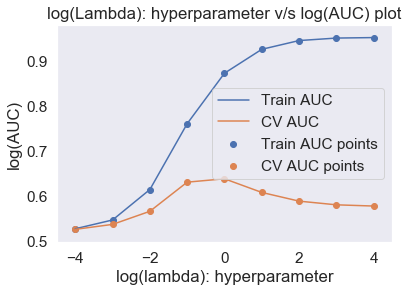

In [194]:
lr = LogisticRegression()
parameters = {'C':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]} 
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc')
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score'] 
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()


# Inference:
Determining appropriate value for my parameter was not possible.
Then i re-ran the GridSearchCV on parameters of small set of values.

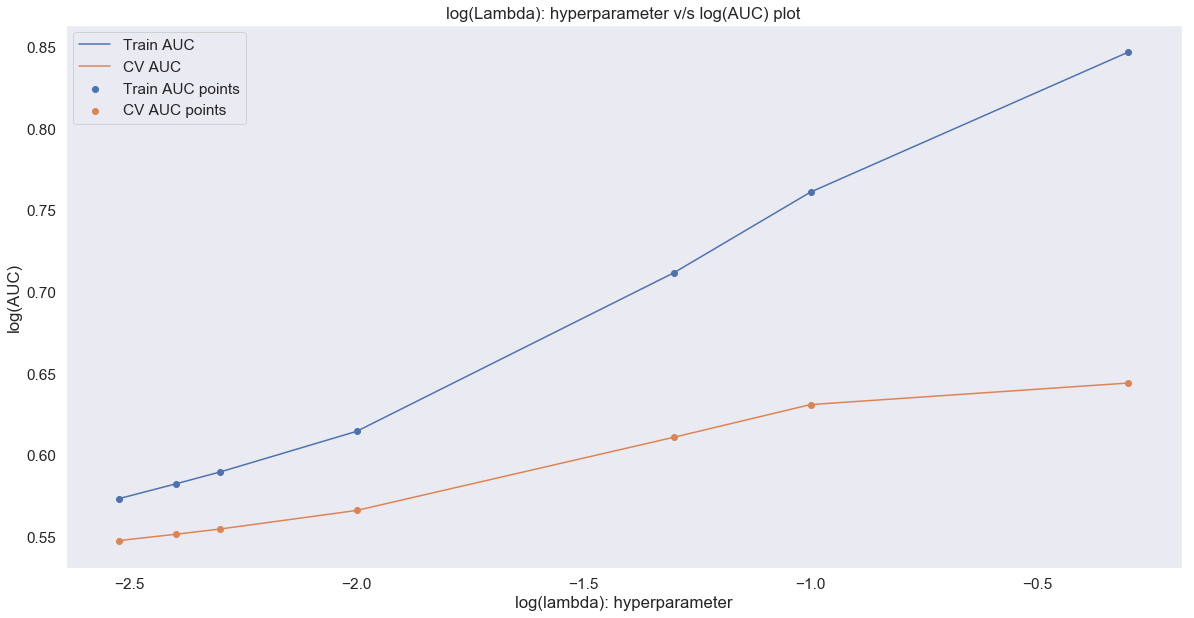

In [195]:
lr = LogisticRegression()
parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]}
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc') 
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()

# Inference:0.005 is chosen as the best hyperparameter value.

# B) Train the model using the best hyper parameter value

In [196]:
def batch_predict(clf, data): 
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the posi tive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

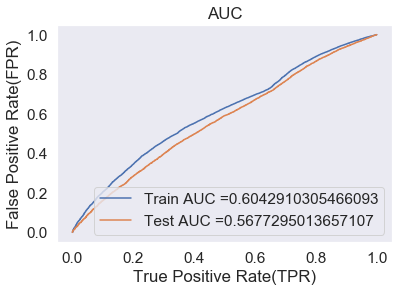

In [197]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve 
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C = 0.005)
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C)Confusion Matrix

In [198]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

# Train Data

In [199]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.85
[[ 3713  3713]
 [15443 26172]]


In [200]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)),
                                    range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.85


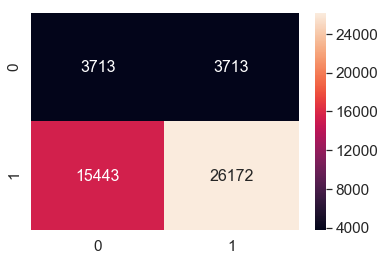

In [201]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Test Data

In [202]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.855
[[ 3161  2298]
 [14812 15781]]


In [203]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test,
                                            predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.855


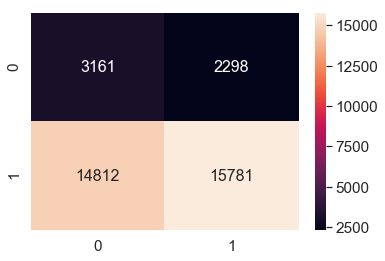

In [204]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Set 2 : Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay

In [205]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train,
               project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train,
               quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train,
               title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test,
               project_grade_categories_one_hot_test,teacher_prefix_categories_one_hot_test, price_test, quantity_test,
               prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv,
               project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv,
               prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [206]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 6811) (49041,)
(24155, 6811) (24155,)
(36052, 6811) (36052,)


# A) GridSearchCV 

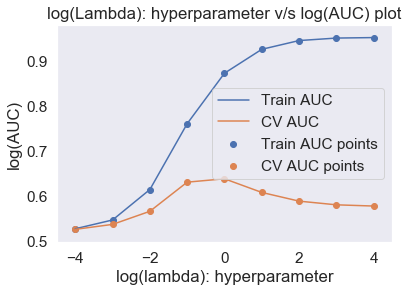

In [207]:
lr = LogisticRegression()
parameters = {'C':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc')
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()

# Inference:
Determining appropriate value for my parameter was not possible.
Then i re-ran the GridSearchCV on parameters of small set of values.

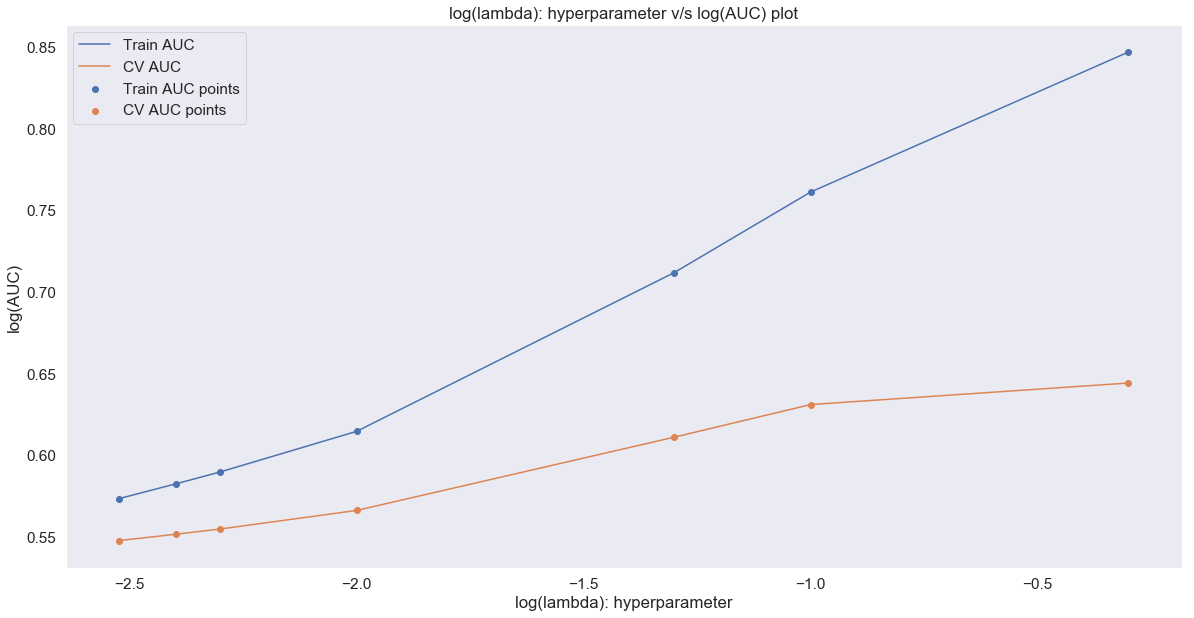

In [208]:
lr = LogisticRegression()
parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]}
clf = GridSearchCV(lr, parameters, cv=2, scoring='roc_auc') 
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()

# Inference:
The AUC values for the points before and after 0.5 seems to be lower.While for 0.5 there seems to be a majordifference between the Train and the Test model.So, 0.1 is taken as best hyper parameter value.

# B) Train the model using the best hyper parameter value

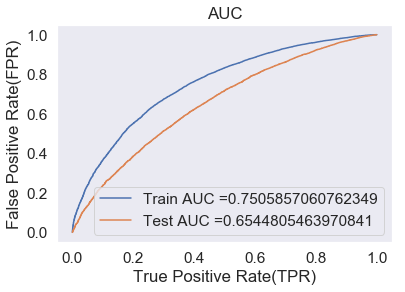

In [209]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve 
from sklearn.metrics import roc_curve, auc
model = LogisticRegression(C = 0.1)
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C)Confusion Matrix

In [210]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

# Train Data

In [211]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.817
[[ 3713  3713]
 [ 6991 34624]]


In [212]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)),
                                    range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.817


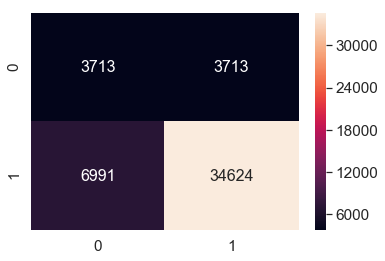

In [213]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Test Data

In [214]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.835
[[ 2803  2656]
 [ 9044 21549]]


In [215]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test,
                                            predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092995 for threshold 0.835


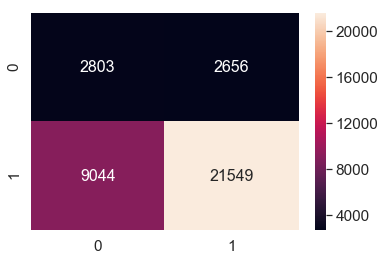

In [216]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Set 3 : Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V)

In [217]:
#merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,
school_state_categories_one_hot_train, project_grade_categories_one_hot_train,
teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train,
essay_word_count_train, avg_w2v_vectors_train,avg_w2v_vectors_titles_train)).tocsr()

X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,
school_state_categories_one_hot_test, project_grade_categories_one_hot_test,
teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test,
title_word_count_test, essay_word_count_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()

X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,
school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv,
teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv,
essay_word_count_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [218]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 705) (49041,)
(24155, 705) (24155,)
(36052, 705) (36052,)


# A) GridSearchCV

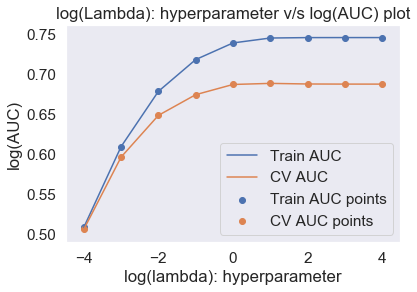

In [219]:
lr = LogisticRegression()
parameters = {'C':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc')
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()

# Inference:
1. points ranging 100 and above seems like fruitless as the AUC is almost constant after a certain point.
2. Very low values ranging between 10^-4 and 10^-3 do not have a very appreciatable AUC score.
3. So we will consider the points in between for a better understanding and to obtain a better model.

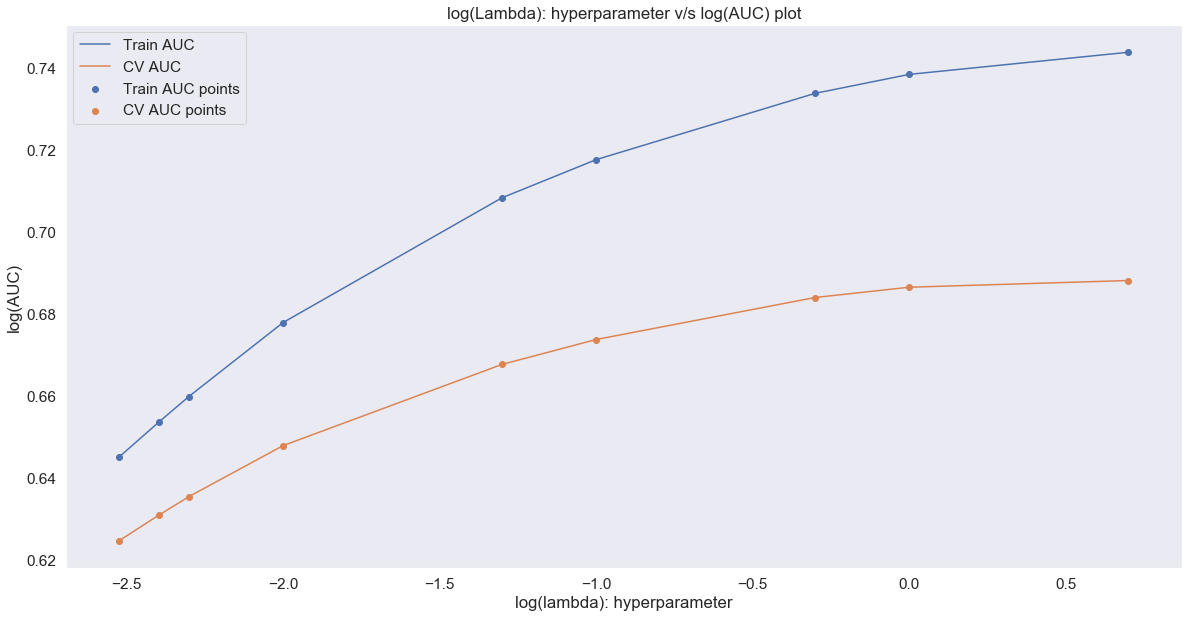

In [220]:
lr = LogisticRegression()
parameters = {'C':[5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]}
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc')
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()
#It took 4hrs 

# Inference:1.0 is chosen as the best hyper parameter value.

# B) Train the model using the best hyper parameter value

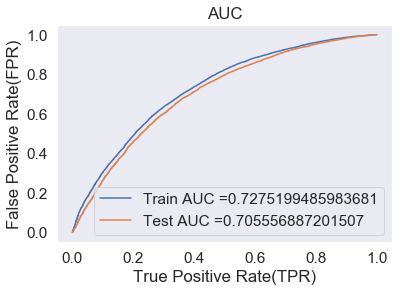

In [221]:
model = LogisticRegression(C = 1.0)
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C)Confusion Matrix

# Train Data

In [222]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.787
[[ 3713  3713]
 [ 7377 34238]]


In [223]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)),
                                    range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.787


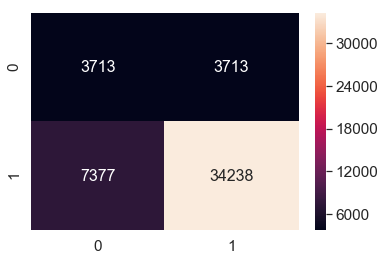

In [224]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Test Data

In [225]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.834
[[ 3365  2094]
 [ 9368 21225]]


In [226]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test,
                                            predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.834


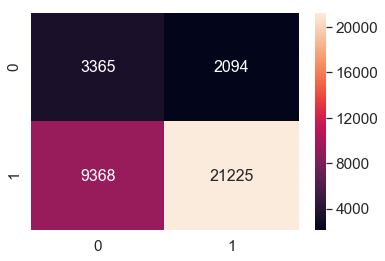

In [227]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [228]:
#merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,
school_state_categories_one_hot_train, project_grade_categories_one_hot_train,
teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train,
title_word_count_train,essay_word_count_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,
school_state_categories_one_hot_test, project_grade_categories_one_hot_test,
teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test,
title_word_count_test, essay_word_count_test, tfidf_w2v_vectors_test,tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,
school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv,
teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv,
essay_word_count_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [229]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 705) (49041,)
(24155, 705) (24155,)
(36052, 705) (36052,)


# A) GridSearchCV

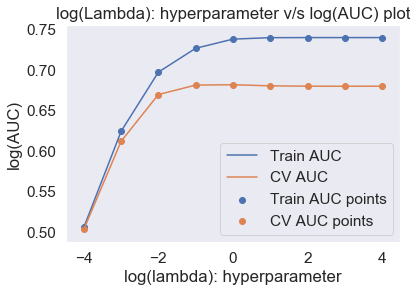

In [230]:
lr = LogisticRegression()
parameters = {'C':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc')
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()                  

# Inference
1. points ranging 100 and above seem to be futile as the AUC is almost constant after a certain point.
2. very low values ranging between 10^-4 and 10^-3 do not have a very appreciatable AUC score.
3. Lets consider the points in between for a better understanding and to obtain a better model.

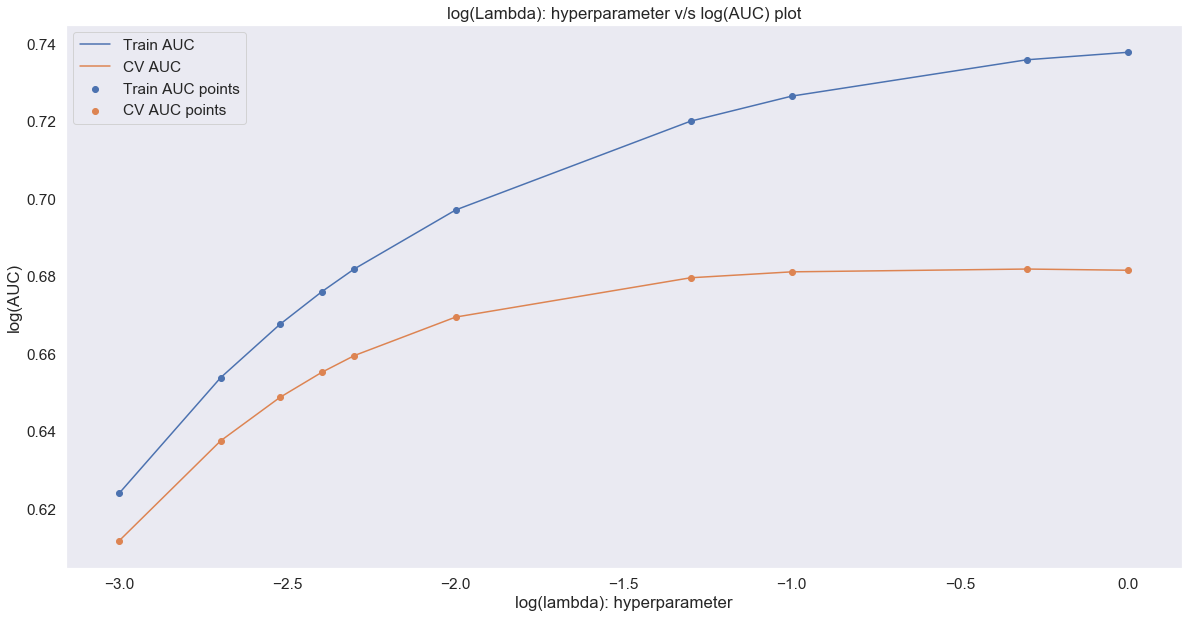

In [231]:
lr = LogisticRegression()
parameters = {'C':[1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001]}
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc')
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()

# Inference:0.01 is chosen as the best hyper parameter value.

# B) Train the model using the best hyper parameter value

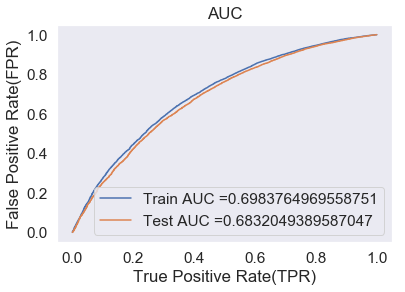

In [232]:
model = LogisticRegression(C = 0.01)
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C)Confusion Matrix

# Train Data

In [233]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.812
[[ 3713  3713]
 [ 9263 32352]]


In [234]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr,
                                                                      train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.812


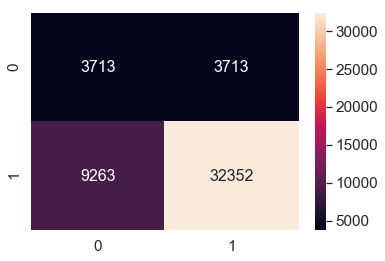

In [235]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

# Test Data

In [236]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.837
[[ 3377  2082]
 [10694 19899]]


In [237]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr,
                                                                    test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.837


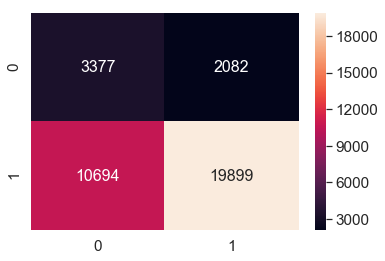

In [238]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

# Set 5 : Categorical features, Numerical features & Essay Sentiments

In [239]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train,
school_state_categories_one_hot_train, project_grade_categories_one_hot_train
,teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train,
title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train,
essay_sent_neu_train, essay_sent_compound_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test,
school_state_categories_one_hot_test, project_grade_categories_one_hot_test,
teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test,
title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test,
essay_sent_compound_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,
school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv,
teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv,
essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_compound_cv)).tocsr()

In [240]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 109) (49041,)
(24155, 109) (24155,)
(36052, 109) (36052,)


# A) GridSearchCV

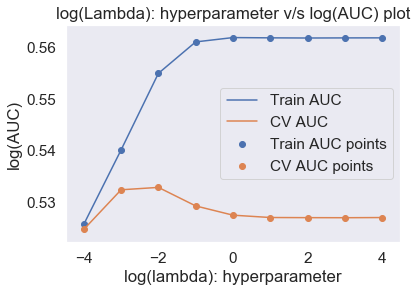

In [241]:
lr = LogisticRegression()
parameters = {'C':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc')
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()

# Inference
1. points ranging 100 and above seem to be futile as the AUC is almost constant after a certain
   point.
2. very low values ranging between 10^-4 and 10^-3 do not have a very appreciatable AUC score.
3. Lets consider the points in between for a better understanding and to obtain a better model.

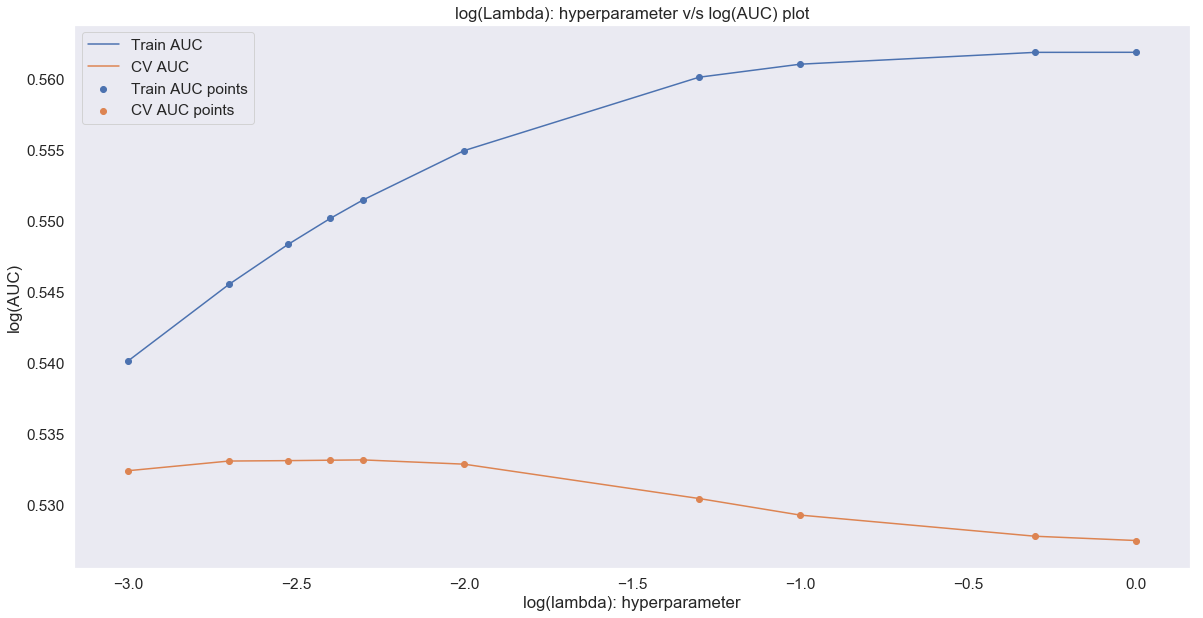

In [242]:
lr = LogisticRegression()
parameters = {'C':[1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001]}
clf = GridSearchCV(lr, parameters, cv= 2, scoring='roc_auc')
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.figure(figsize=(20,10))
plt.plot(np.log10(parameters['C']), train_auc, label='Train AUC')
plt.plot(np.log10(parameters['C']), cv_auc, label='CV AUC')
plt.scatter(np.log10(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log10(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(lambda): hyperparameter")
plt.ylabel("log(AUC)")
plt.title("log(Lambda): hyperparameter v/s log(AUC) plot")
plt.grid()
plt.show()

# Inference:0.01 is chosen as the best hyper parameter value.

# B) Train the model using the best hyper parameter value

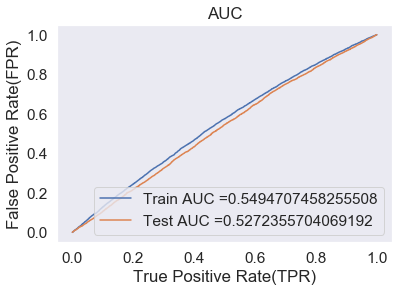

In [243]:
model = LogisticRegression(C = 0.01)
model.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(model, X_tr)
y_test_pred = batch_predict(model, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

# Train Data

In [244]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999274645848 for threshold 0.853
[[ 3715  3711]
 [17721 23894]]


In [245]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,
train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2499999274645848 for threshold 0.853


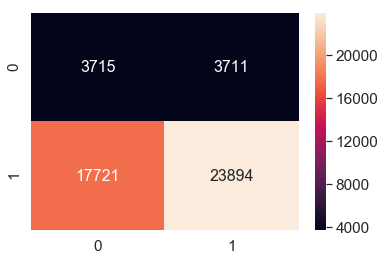

In [246]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

# Test Data

In [247]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999979027324915 for threshold 0.857
[[ 3145  2314]
 [16481 14112]]


In [248]:
conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds,
                                                                    test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999979027324915 for threshold 0.857


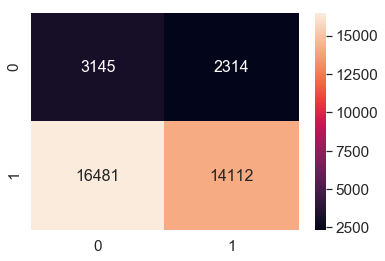

In [249]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_5, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>4. Conclusion</h1>

In [250]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "AUC"]
x.add_row(["BOW", "Logistic Regression", 0.005, 0.67])
x.add_row(["TFIDF", "Logistic Regression", 0.1, 0.66])
x.add_row(["AVG W2V", "Logistic Regression", 1.0, 0.7])
x.add_row(["TFIDF W2V", "Logistic Regression", 0.01, 0.57])
x.add_row(["WITHOUT TEXT", "Logistic Regression", 0.01, 0.57])
print(x)

+--------------+---------------------+-----------------------+------+
|  Vectorizer  |        Model        | Alpha:Hyper Parameter | AUC  |
+--------------+---------------------+-----------------------+------+
|     BOW      | Logistic Regression |         0.005         | 0.67 |
|    TFIDF     | Logistic Regression |          0.1          | 0.66 |
|   AVG W2V    | Logistic Regression |          1.0          | 0.7  |
|  TFIDF W2V   | Logistic Regression |          0.01         | 0.57 |
| WITHOUT TEXT | Logistic Regression |          0.01         | 0.57 |
+--------------+---------------------+-----------------------+------+


# SUMMARY:
1. Here we can confirm that Text data contained in the Essays and Essay Titles also play a major role in predicting the outcome    of the project.
2. Hence, it can't be neglected as most of the models containing them proved to have a better AUC score.